# Predicting Default Payments with Fully-Connected NNs

The dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

## Inspecting the data

any comment about data dimensionality/distribution goes here

In questo paragrafo l'obiettivo è di mostrare la dimensione del dataset, esaminare i tipi di variabili (numeriche e categoriche) e la loro distribuzione.

In [1]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load the dataset
train_data = pd.read_csv("train.csv")

In [3]:
# data types
train_data.dtypes

ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

In [4]:
# Display the first five rows of the dataset
train_data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,19193,200000,2,1,1,38,-2,-2,-2,-2,...,2571,2571,2571,2772,2571,2571,2571,2571,2571,0
1,1131,230000,2,2,1,34,0,0,0,0,...,155335,153427,150514,8913,5449,5339,5370,4435,4432,1
2,17557,50000,2,2,2,42,0,0,0,0,...,49311,24663,24854,1763,2112,1756,324,336,351,0
3,29901,20000,1,2,2,29,0,0,-2,-2,...,0,0,0,0,0,0,0,0,0,1
4,14696,30000,2,3,1,59,1,2,2,2,...,30467,29858,28898,1950,200,2492,0,580,0,1


In [5]:
# Generate descriptive statistics for numerical columns to understand distributions and identify potential outliers.
train_data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,25500.00000,25500.000000,25500.000000,25500.000000,25500.000000,25500.000000,25500.000000,25500.000000,25500.000000,25500.000000,...,25500.000000,25500.000000,25500.000000,25500.000000,2.550000e+04,25500.000000,25500.000000,25500.000000,25500.000000,25500.000000
mean,14956.95702,167569.007059,1.604118,1.852353,1.550392,35.509294,-0.013098,-0.130784,-0.163294,-0.218235,...,43336.952196,40307.121059,38924.328157,5594.010863,5.934389e+03,5319.529647,4812.161373,4812.480431,5236.509176,0.222941
std,8667.36982,130002.156470,0.489049,0.787991,0.522757,9.200408,1.126314,1.199481,1.199697,1.169681,...,64433.082446,60870.691089,59659.509920,16235.253410,2.381277e+04,18157.653215,15560.524538,15206.108094,17958.888070,0.416227
min,1.00000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7432.75000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2338.750000,1767.250000,1266.750000,1000.000000,8.270000e+02,396.000000,291.000000,251.000000,125.750000,0.000000
50%,14942.50000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19111.000000,18112.500000,17150.000000,2100.000000,2.002000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,22431.25000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54475.000000,50178.250000,49132.500000,5006.000000,5.000000e+03,4560.500000,4000.000000,4071.500000,4000.000000,0.000000
max,30000.00000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


In [6]:
# Get a summary of the dataset
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25500 entries, 0 to 25499
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          25500 non-null  int64
 1   LIMIT_BAL                   25500 non-null  int64
 2   SEX                         25500 non-null  int64
 3   EDUCATION                   25500 non-null  int64
 4   MARRIAGE                    25500 non-null  int64
 5   AGE                         25500 non-null  int64
 6   PAY_0                       25500 non-null  int64
 7   PAY_2                       25500 non-null  int64
 8   PAY_3                       25500 non-null  int64
 9   PAY_4                       25500 non-null  int64
 10  PAY_5                       25500 non-null  int64
 11  PAY_6                       25500 non-null  int64
 12  BILL_AMT1                   25500 non-null  int64
 13  BILL_AMT2                   25500 non-null  int64
 14  BILL_A

In [7]:
# Checking the dimensionality of the training dataset.
print("Size of the training dataset:", train_data.shape)

Size of the training dataset: (25500, 25)


In [8]:
# Check for the presence of null values
train_data.isnull().sum().any()

False

In [9]:
# check for the presence of duplicate values
train_data.duplicated().sum()

0

In [10]:
# Check if there are any infinite values (positive or negative) in the dataset
np.isinf(train_data.values).any()

False

### Univariate Analysis

In questa parte viene effettuata l'analisi univariata, andando a esplorare le distribuzioni delle singole feature presenti nel dataset. Andando a vedere se il dataset è bilanciato o meno.

In [11]:
# Categorical features present in the dataset
categorical_columns = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

# print the unique values that each categorical feature contains
for col in categorical_columns:
    print(f"{col}: {train_data[col].unique()}")

SEX: [2 1]
EDUCATION: [1 2 3 5 4 6 0]
MARRIAGE: [1 2 3 0]
PAY_0: [-2  0  1 -1  2  3  6  5  4  8  7]
PAY_2: [-2  0  2 -1  1  5  3  4  7  6  8]
PAY_3: [-2  0  2 -1  4  3  6  7  5  8  1]
PAY_4: [-2  0  2 -1  3  5  7  4  8  1  6]
PAY_5: [-2  0  2 -1  3  4  7  5  6  8]
PAY_6: [-2  0 -1  2  3  5  7  4  6  8]


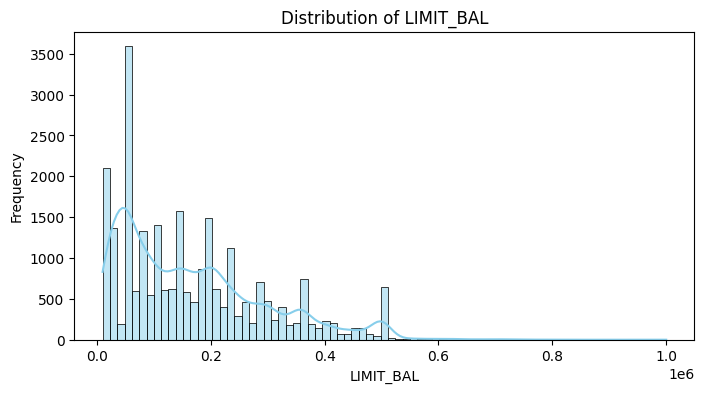

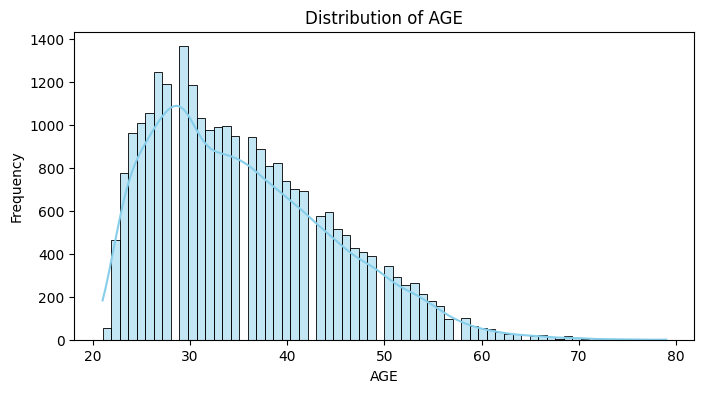

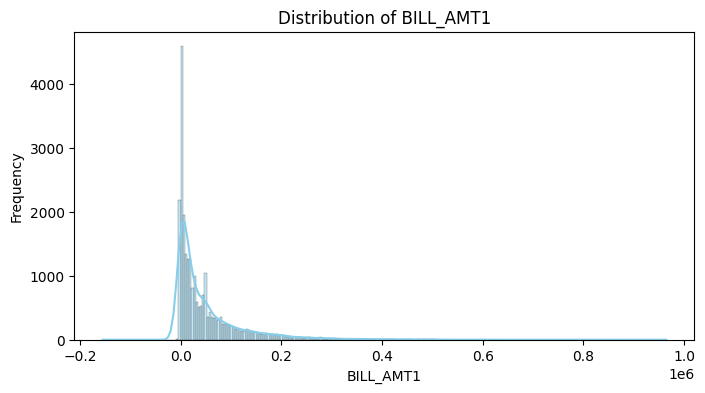

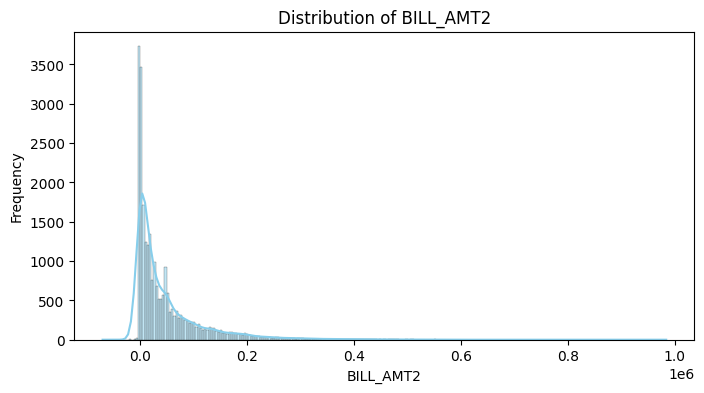

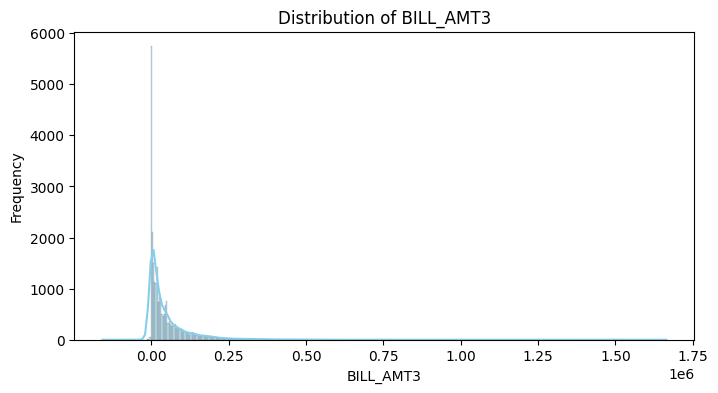

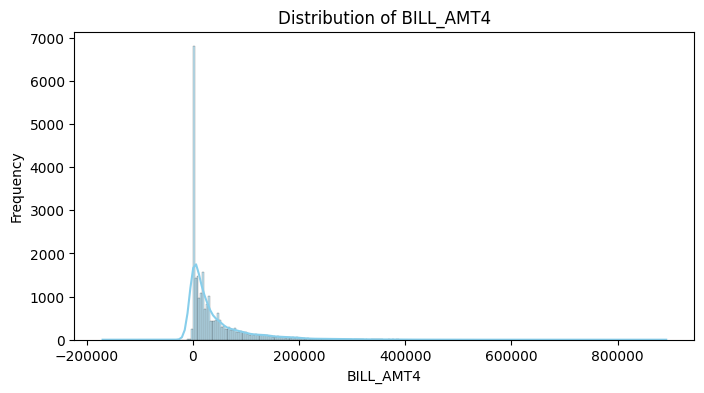

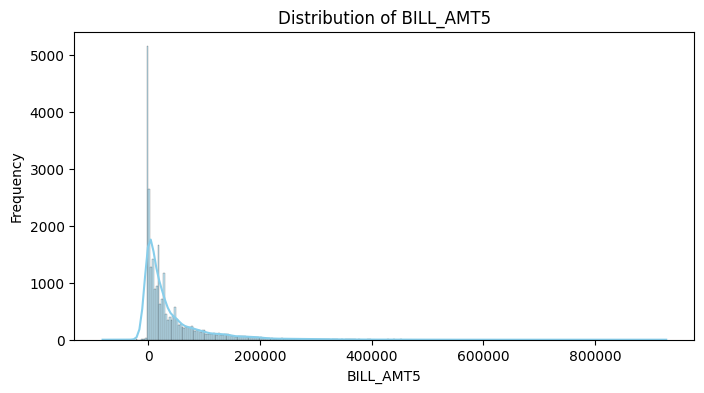

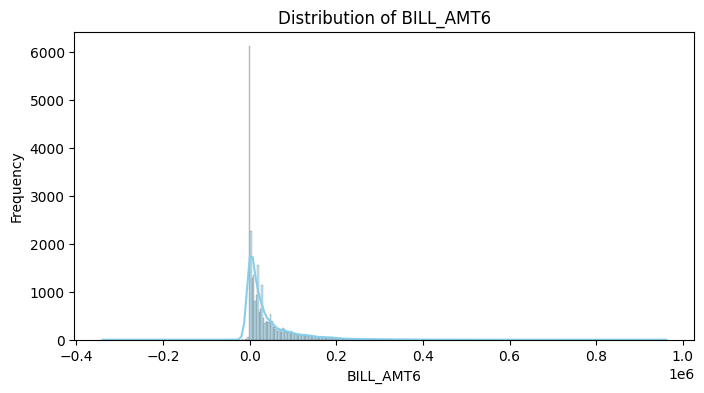

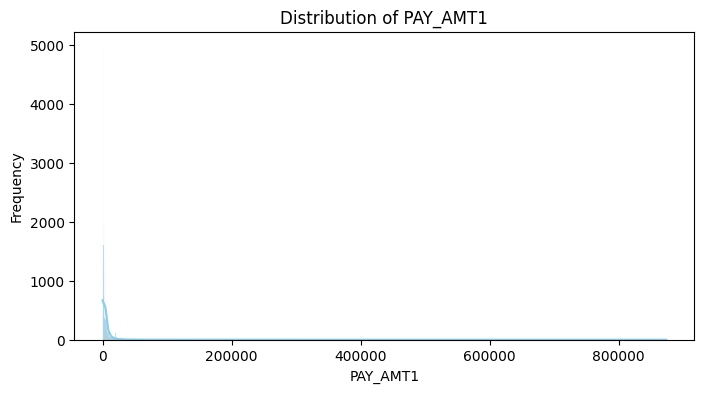

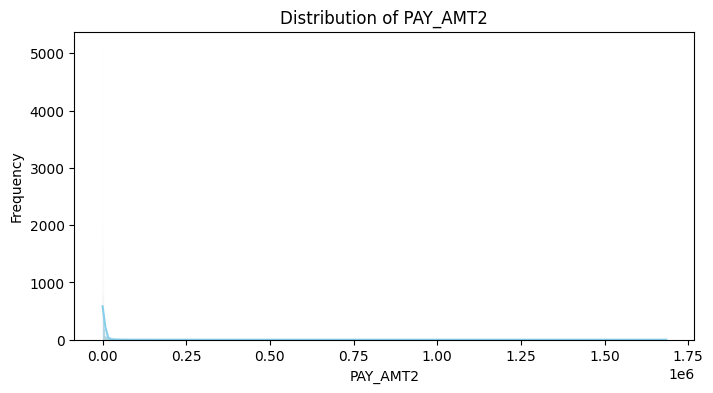

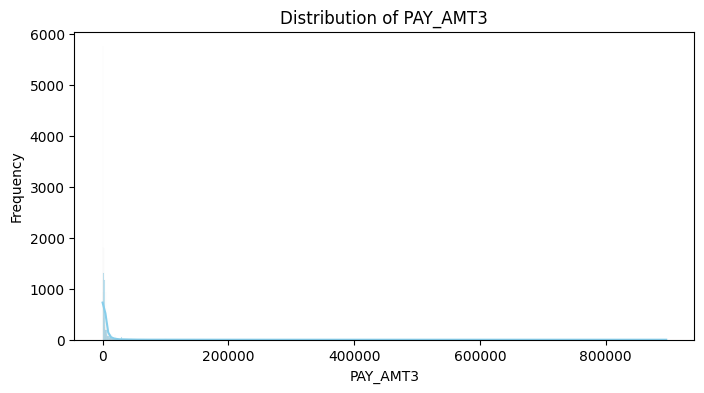

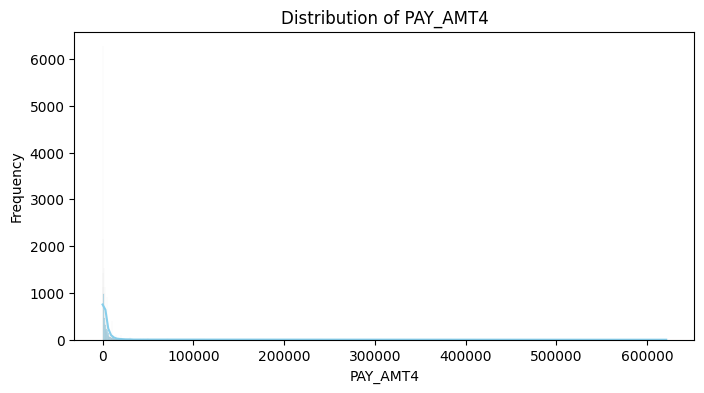

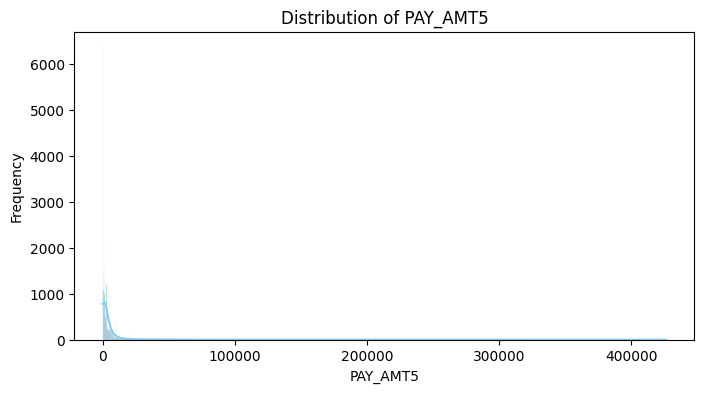

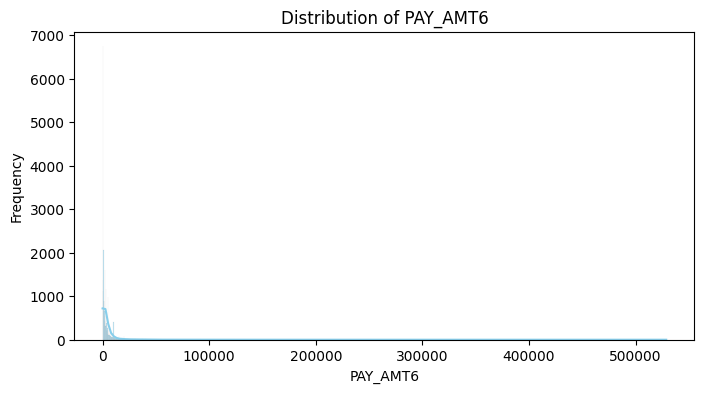

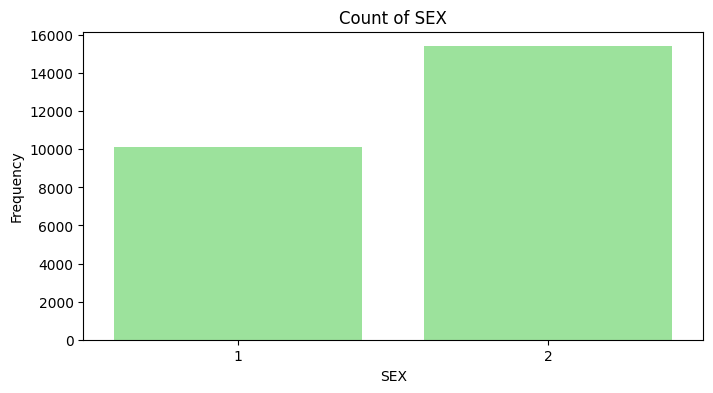

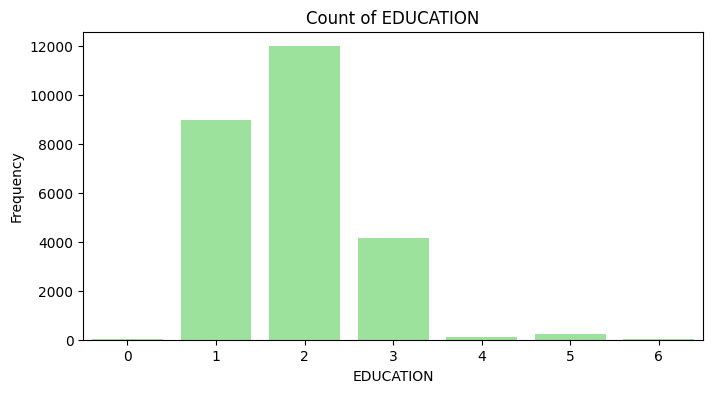

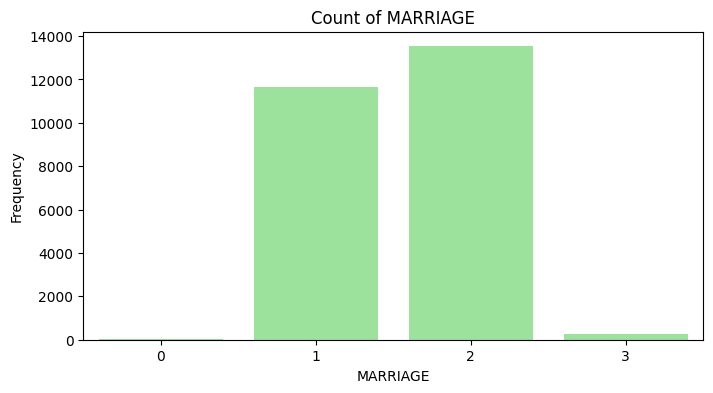

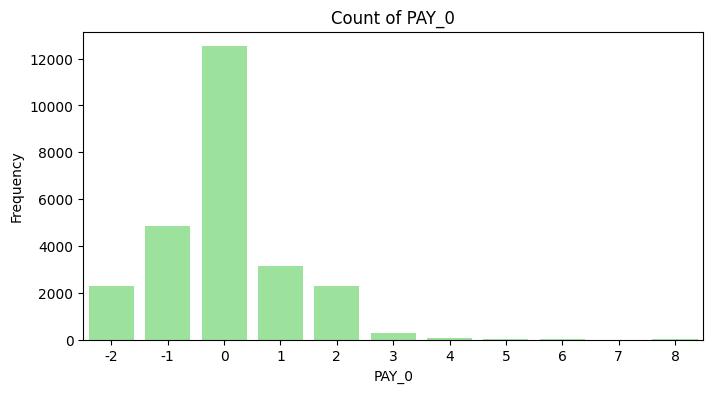

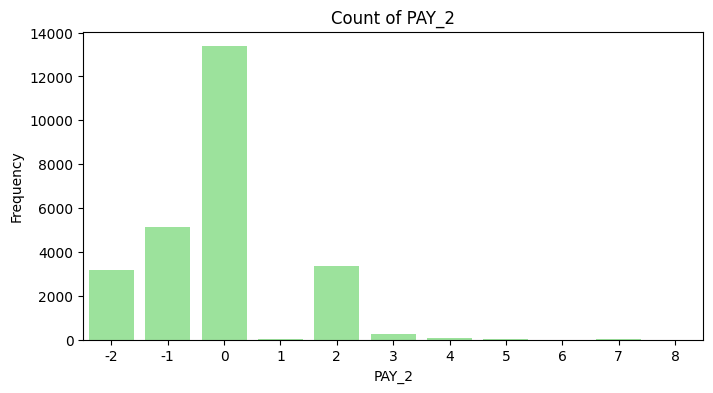

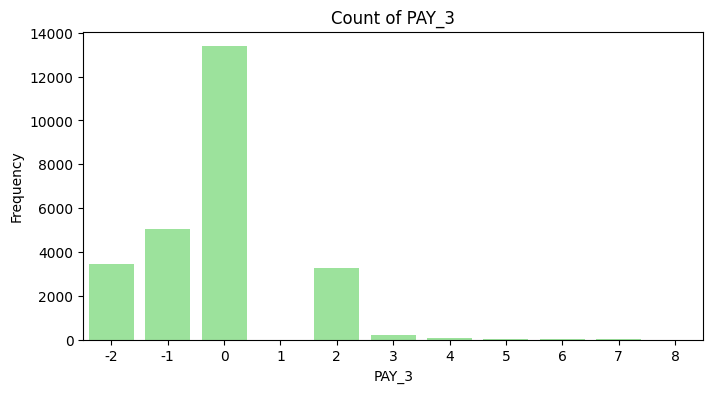

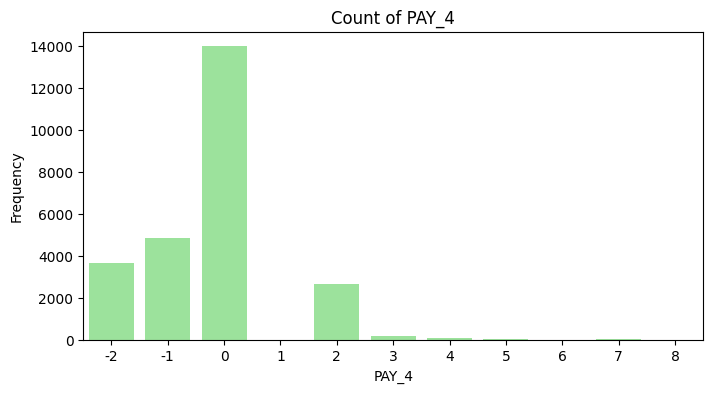

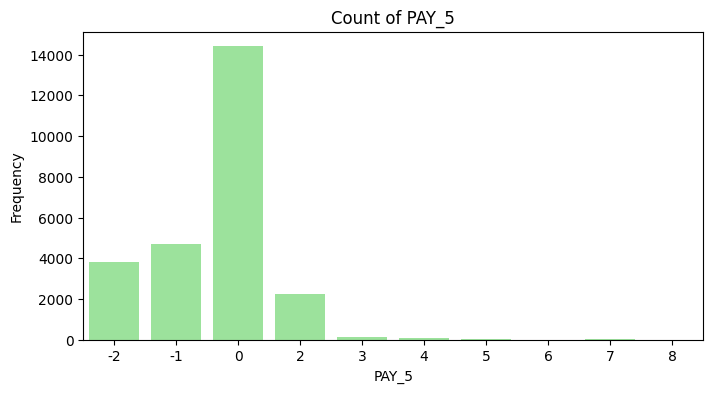

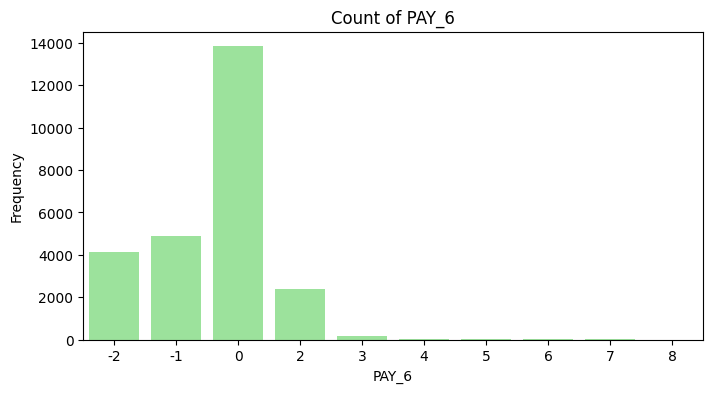

In [12]:
# Numerical features present in the dataset
numerical_columns = ['LIMIT_BAL', 'AGE'] + [f'BILL_AMT{i}' for i in range(1, 7)] + [f'PAY_AMT{i}' for i in range(1, 7)]

# Univariate analysis of numerical feature
for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(train_data[column], kde=True, color='skyblue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Univariate analysis of categorical variables
for column in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=train_data[column], color='lightgreen')
    plt.title(f'Count of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


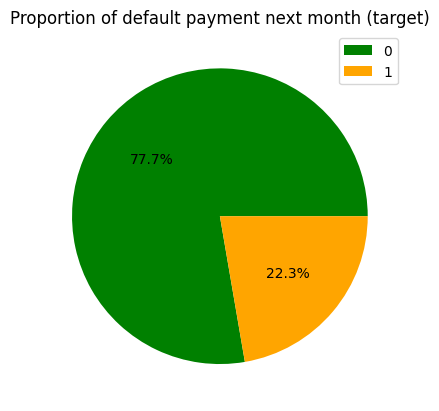

In [13]:
column = 'default payment next month'
total_rows = len(train_data)
counts = train_data[column].value_counts()
percentages = [count / total_rows * 100 for count in counts]
plt.pie(percentages, autopct='%1.1f%%', colors=['green', 'orange'])
plt.title(f'Proportion of {column} (target)')
labels = ['0', '1']
plt.legend(labels=labels, loc='upper right')
plt.show()

Andando a vedere i risultati dell'analisi multivariata, si può partire dall'ultimo grafico, quello che mostra la distribuzione del dataset, e si può vedere come sia molto sbilanciato, con una predominanza di 0 rispetto a 1. 
Dalle feature numeriche possiamo notare dall'età che i clienti sono persone con utà compresa tra i 25 e 35 anni. Nelle 6 feature che rappresentano il 'BILL_AMTx' sono presenti dei valori negativi, che possono rappresentare rimborsi o crediti da parte dei clienti.
Andando a vedere i grafici delle feature categoriche, andando a vedere la feature 'PAY_x" che predilige in modo significativo 0, si può interpretare questo dato in cui i clienti pagano con un mese ritardo.

### Analisi statica Multivaraiata

Ora si vuole effettuare l'analisi multivariata, andando ad analizzare le feature categoriche con la variabile target. Analizzando come le classi della variabile target variano in base alle feature categoriali. E si vuole, inoltre, capire la capire le correlazioni tra le feature del dataset e il target.

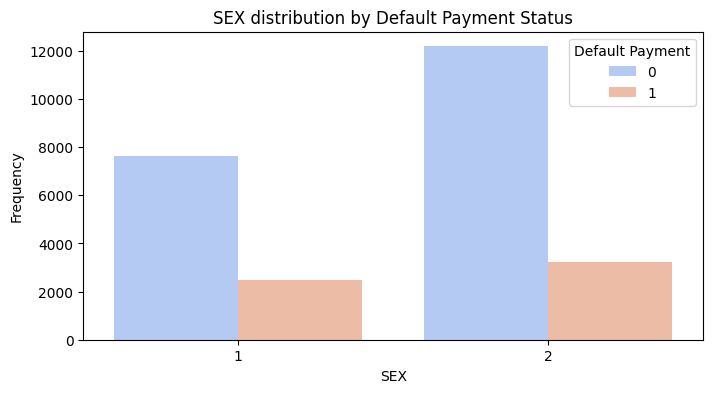

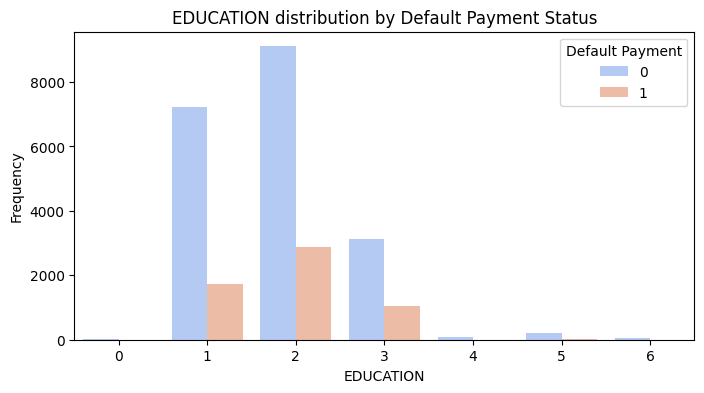

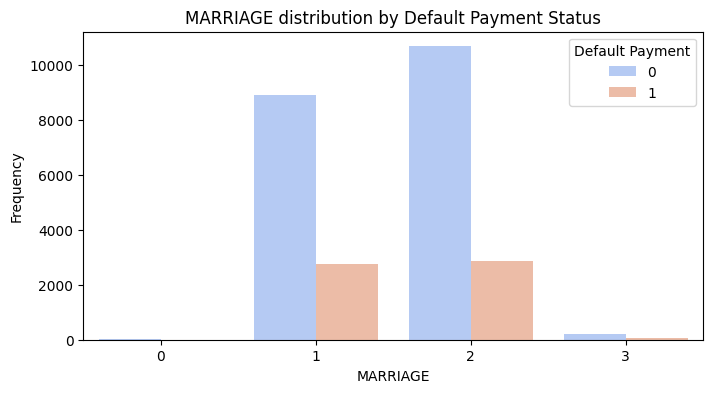

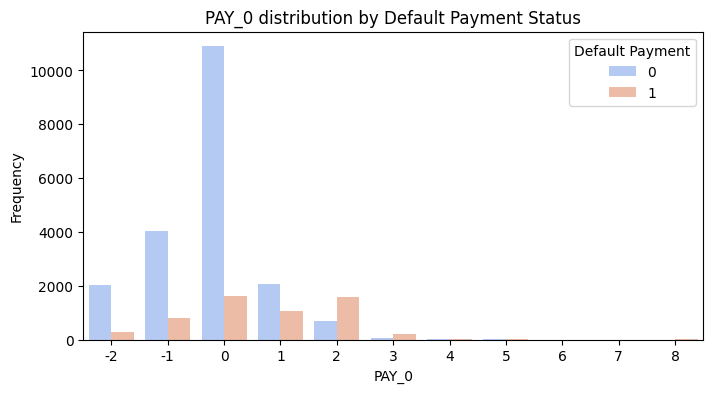

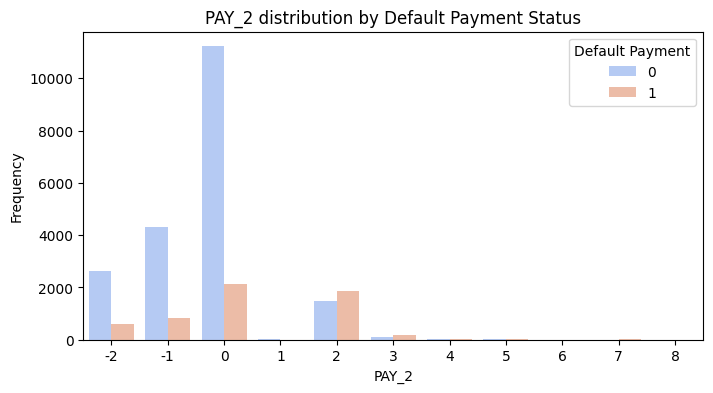

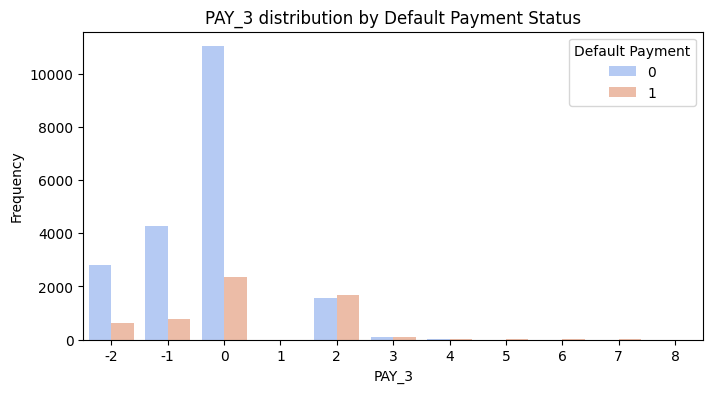

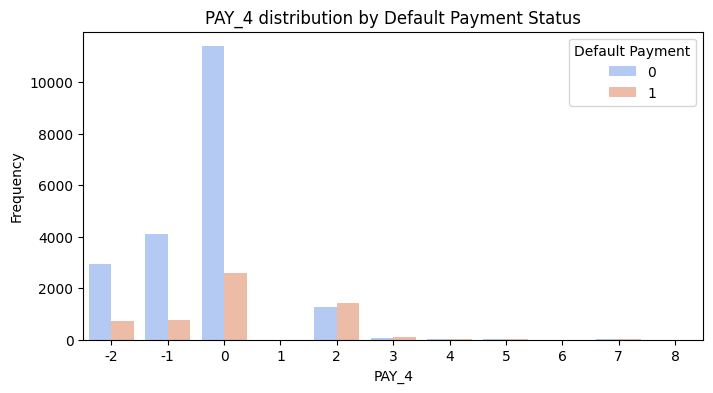

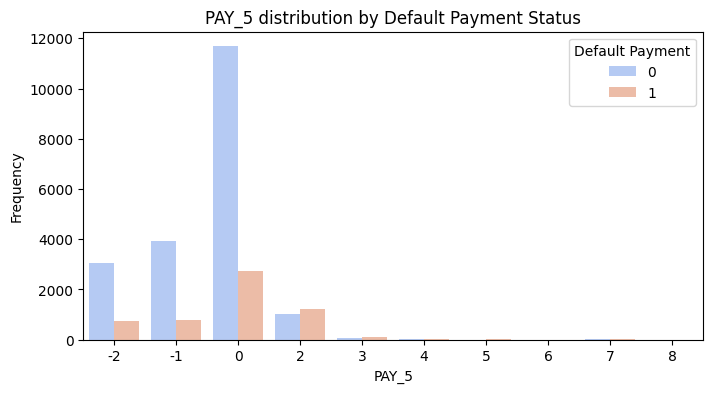

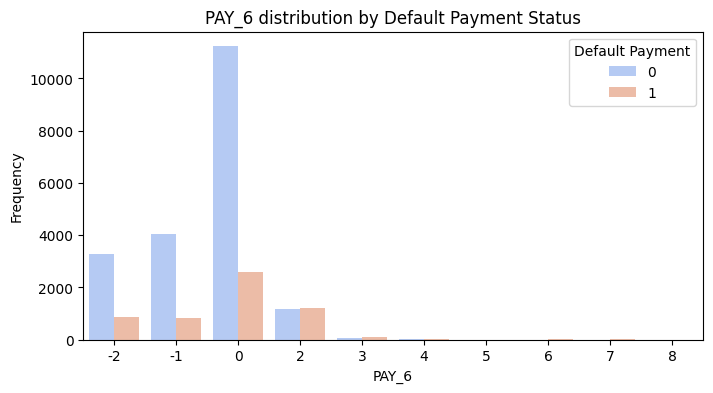

In [14]:
# feature categoriche
categorical_columns = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

# Relazione tra variabili categoriche e la variabile target
for column in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=column, hue='default payment next month', data=train_data, palette='coolwarm')
    plt.title(f'{column} distribution by Default Payment Status')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.legend(title='Default Payment')
    plt.show()

Dai grafici si può notare come i clienti con un 'education' di università tendono a pagare. Nelle feature 'PAY_x' i clienti tendono a pagare con un mese di ritardo.

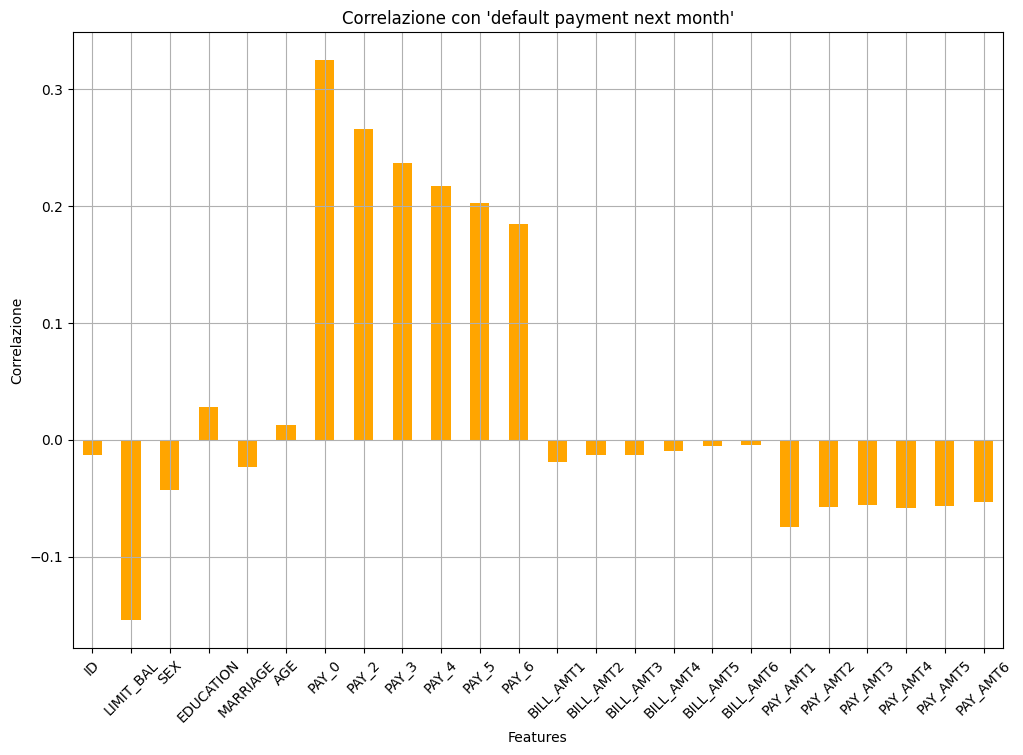

In [15]:
# Calcola la correlazione tra ogni feature e il target
correlation = train_data.drop('default payment next month', axis=1).corrwith(train_data['default payment next month'])

# Crea un grafico a barre per visualizzare le correlazioni
plt.figure(figsize=(12, 8))
correlation.plot(kind='bar', grid=True, color='orange')
plt.title("Correlazione con 'default payment next month'")
plt.xlabel("Features")
plt.ylabel("Correlazione")
plt.xticks(rotation=45)
plt.show()


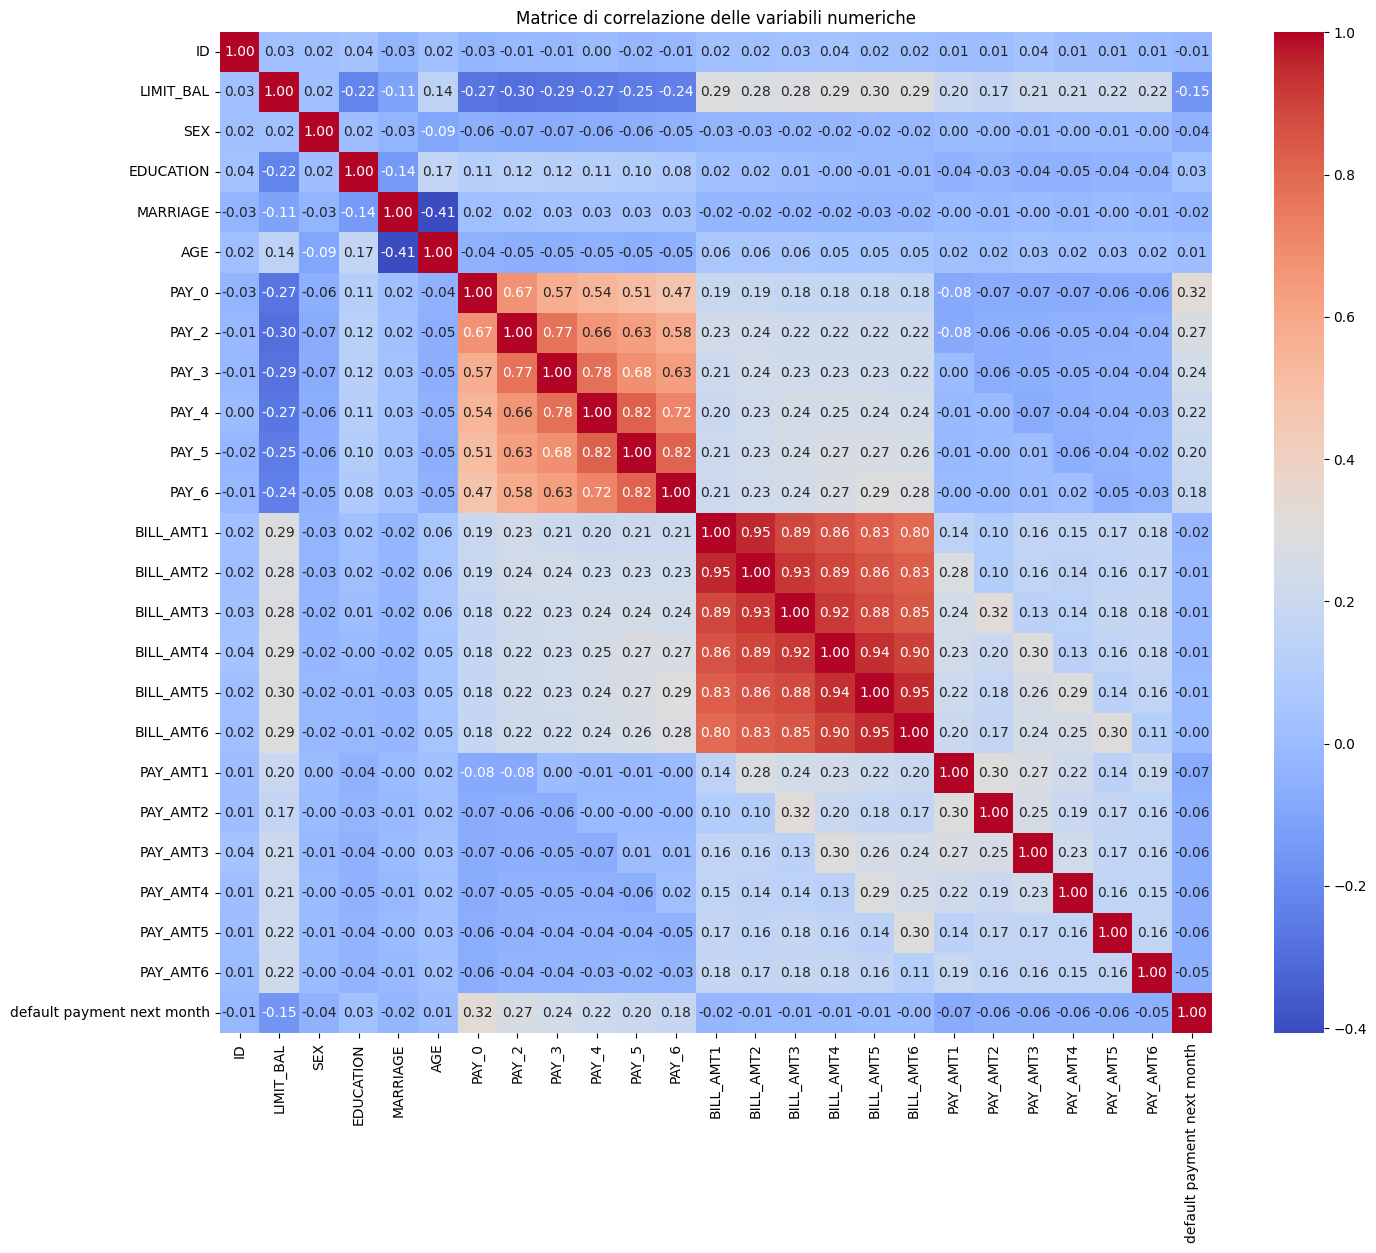

In [16]:
# relazioni tra variabili
# Mappa di correlazione
plt.figure(figsize=(16, 13))
correlation_matrix = train_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrice di correlazione delle variabili numeriche')
plt.show()


Andando ad analizzare il grafico che rappresenta la correlazione tra feature e target, si può notare che hanno una forte correlazione le feature 'LIMIT_BAL', 'EDUCATION', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5' e 'PAY_6'. Questa cosa viene poi confermata andandno a vedere l'ultima riga della matrice di correlazione.

## Preparing the data

describe the choice made during the preprocessing operations, also taking into account the previous considerations during the data inspection.

In questo paragrafo, si prearano i dati prima di andare a effettuare le predizioni. Le uniche modifiche al dataset che si apportano sono di eliminare la feature 'ID' e di andare ad accorpare nella feture 'EDUCATION' i valor 0, 5 e 6 tutti in 4. 
Grazie all'analisi univariata si è notato che stiamo lavorando con un dataset molto sbilanciato, per risolvere questo problema effettuamo un bilanciamento tramite SMOTE. Dopodiché, si è passati ad applicare il one-hot encoding solo sulle feature categoriche, però di quest'ultime abbiamo escluso tutti i pagameti, per evitare di ottenere un numero elevato di colonne. Infine, si applica lo scalining alle feature numeriche. 

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [18]:
original_counts = train_data['default payment next month'].value_counts()
print("Valori nel dataset originale:\n", original_counts)
print("Rapporto:\n", original_counts[0]/original_counts[1])

Valori nel dataset originale:
 default payment next month
0    19815
1     5685
Name: count, dtype: int64
Rapporto:
 3.4854881266490767


In [19]:
# Drop feature 'ID'
df = train_data.drop(columns=['ID'])

In [20]:
# Replace values 0, 5 and 6 in 4
df['EDUCATION'] = df['EDUCATION'].replace([0, 5, 6], 4)

In [21]:
df.dtypes

LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

In [22]:
X = df.drop(columns=['default payment next month'])
y = df['default payment next month']

#  Verification of raw dataset classes
print(y.value_counts())

default payment next month
0    19815
1     5685
Name: count, dtype: int64


In [23]:
# Categorical feature
columns_to_encode = ['SEX', 'EDUCATION', 'MARRIAGE']
columns_pay = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

# Numerical feature
numerical_columns = X.columns.difference(columns_to_encode + columns_pay)

In [24]:
# Over-sampling use SMOTE
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

print(y.value_counts())

default payment next month
0    19815
1    19815
Name: count, dtype: int64


In [25]:
# One-hot encoding
X = pd.get_dummies(X, columns=columns_to_encode, drop_first=True)

In [26]:
# Scaling
scaler = StandardScaler()
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])
#x_test = scaler.transform(x_test)

In [27]:
# Dividing the dataset into training set and test set (with test_size equal to 30%)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Building the network

any description/comment about the procedure you followed in the choice of the network structure and hyperparameters goes here, together with consideration about the training/optimization procedure (e.g. optimizer choice, final activations, loss functions, training metrics)

In [28]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Input
from keras.optimizers import SGD, Adam

### Addestramento modello con Adam

In [29]:
dims = x_train.shape[1]
print('Input Shape =', dims)

nb_classes = 1
print('Number classes = Output Shape =', nb_classes)

model = Sequential()
model.add(Input((dims,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

optimizer = Adam(learning_rate=0.0001)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

Input Shape = 27
Number classes = Output Shape = 1


In [30]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │           264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,145 (16.19 KB)

 Trainable params: 4,145 (16.19 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
history = model.fit(x_train, y_train, batch_size=60, epochs=50, validation_split=0.1)

Epoch 1/50
417/417 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6077 - loss: 0.6504 - val_accuracy: 0.7128 - val_loss: 0.5866
Epoch 2/50
417/417 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7153 - loss: 0.5790 - val_accuracy: 0.7384 - val_loss: 0.5532
Epoch 3/50
417/417 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7354 - loss: 0.5546 - val_accuracy: 0.7481 - val_loss: 0.5375
Epoch 4/50
417/417 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7369 - loss: 0.5437 - val_accuracy: 0.7521 - val_loss: 0.5298
Epoch 5/50
417/417 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7436 - loss: 0.5330 - val_accuracy: 0.7535 - val_loss: 0.5251
Epoch 6/50
417/417 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7418 - loss: 0.5289 - val_accuracy: 0.7550 - val_loss: 0.5218
Epoch 7/50
417/417 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7449 - loss: 0.5220 - val_accuracy: 0.7575 - val_loss: 0.5201
Epoch 8/50
417/417 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7455 - loss: 0.5216 - val_accuracy: 0.

In [32]:
import matplotlib.pyplot as plt

def plot_loss(history):
  x_plot = list(range(1,len(history.history["loss"])+1))
  plt.figure()
  plt.title("Loss")
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.plot(x_plot, history.history['loss'])
  plt.plot(x_plot, history.history['val_loss'])
  plt.legend(['Training', 'Validation'])

def plot_accuracy(history):
  x_plot = list(range(1,len(history.history["accuracy"])+1))
  plt.figure()
  plt.title("Accuracy")
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.plot(x_plot, history.history['accuracy'])
  plt.plot(x_plot, history.history['val_accuracy'])
  plt.legend(['Training', 'Validation'])

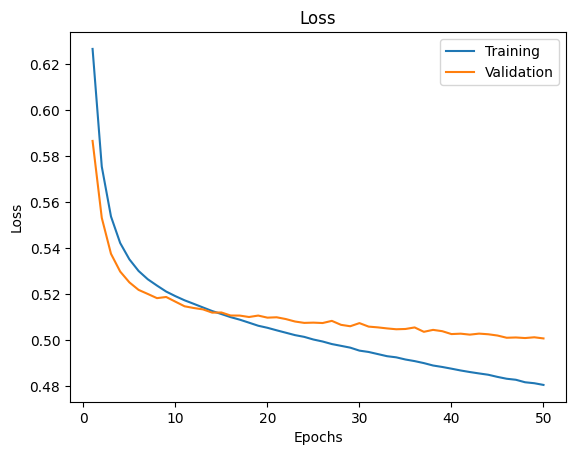

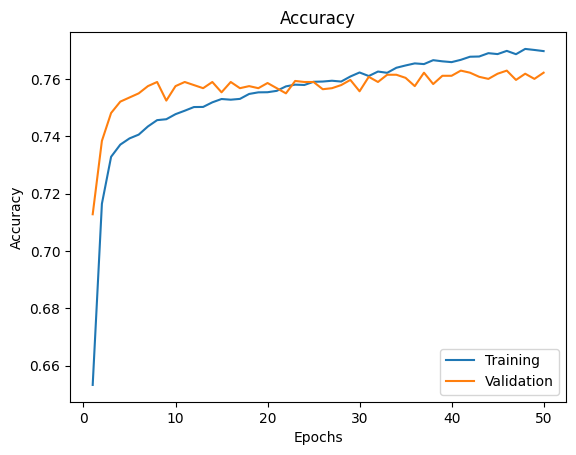

In [33]:
plot_loss(history)
plot_accuracy(history)

#### Addestramento con SGD

In [34]:
dims = x_train.shape[1]
print('Input Shape =', dims)

nb_classes = 1
print('Number classes = Output Shape =', nb_classes)

model2 = Sequential()
model2.add(Input((dims,)))
model2.add(Dense(128, activation='relu'))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(8, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

optimizer = SGD(learning_rate=0.01)

model2.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

Input Shape = 27
Number classes = Output Shape = 1


In [35]:
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 128)            │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 8)              │           264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,193 (55.44 KB)

 Trainable params: 14,193 (55.44 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
history2 = model2.fit(x_train, y_train, batch_size=100, epochs=50, validation_split=0.1)

Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5563 - loss: 0.6875 - val_accuracy: 0.6739 - val_loss: 0.6289
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6717 - loss: 0.6206 - val_accuracy: 0.6984 - val_loss: 0.5915
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7061 - loss: 0.5863 - val_accuracy: 0.7193 - val_loss: 0.5670
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7227 - loss: 0.5678 - val_accuracy: 0.7301 - val_loss: 0.5504
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7336 - loss: 0.5502 - val_accuracy: 0.7398 - val_loss: 0.5402
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7335 - loss: 0.5454 - val_accuracy: 0.7438 - val_loss: 0.5330
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7388 - loss: 0.5381 - val_accuracy: 0.7485 - val_loss: 0.5287
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7444 - loss: 0.5294 - val_accuracy: 0.

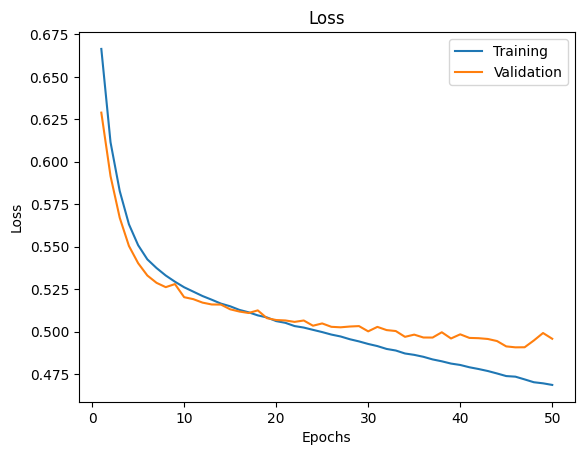

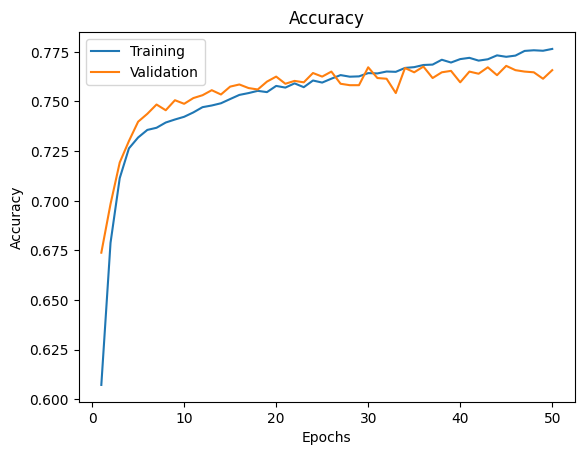

In [37]:
plot_loss(history2)
plot_accuracy(history2)

## Analyze and comment the training results

here goes any comment/visualization of the training history and any initial consideration on the training results  

### Apprendimento con Adam

In [38]:
from sklearn.metrics import classification_report
import numpy as np

# Ottenere le previsioni per il set di test
y_pred_test_m1 = model.predict(x_test)

# Arrotondare le previsioni per ottenere una previsione binaria
y_pred_test_bin_m1 = np.round(y_pred_test_m1)

# Ottenere le previsioni per il set di train
y_pred_train_m1 = model.predict(x_train)

# Arrotondare le previsioni per ottenere una previsione binaria
y_pred_train_bin_m1 = np.round(y_pred_train_m1)

print("Prestazioni sul Set di Addestramento:")
print(classification_report(y_train, y_pred_train_bin_m1))

print("Prestazioni sul Set di Test:")
print(classification_report(y_test, y_pred_test_bin_m1))

372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
867/867 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Prestazioni sul Set di Addestramento:
              precision    recall  f1-score   support

           0       0.76      0.79      0.77     13889
           1       0.78      0.75      0.77     13852

    accuracy                           0.77     27741
   macro avg       0.77      0.77      0.77     27741
weighted avg       0.77      0.77      0.77     27741

Prestazioni sul Set di Test:
              precision    recall  f1-score   support

           0       0.76      0.78      0.77      5926
           1       0.78      0.75      0.76      5963

    accuracy                           0.77     11889
   macro avg       0.77      0.77      0.77     11889
weighted avg       0.77      0.77      0.77     11889



In [39]:
from sklearn.metrics import f1_score
y_pred_prob_m1 = model.predict(x_test)  # Previsioni probabilistiche
y_pred_m1 = (y_pred_prob_m1 > 0.5).astype(int)  # Convertire probabilità in classi

# 7. Calcolare e stampare l'F1-score
f1 = f1_score(y_test, y_pred_m1)
print(f'F1 Score: {f1}')

372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
F1 Score: 0.7626353021392653


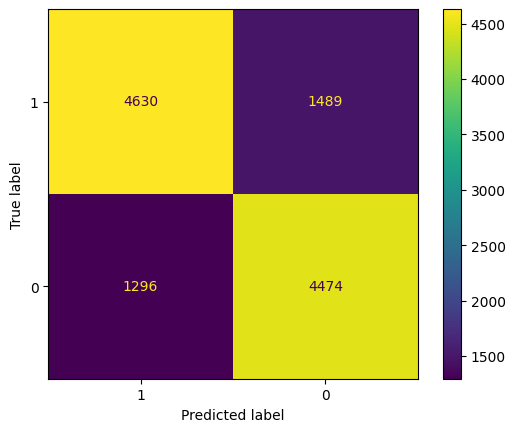

In [40]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Calcolo della matrice di confusione
cm = confusion_matrix(y_pred_test_bin_m1, y_test)
labels = [1,0]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()

### Apprendimento con SGD

In [41]:
from sklearn.metrics import classification_report
import numpy as np

# Ottenere le previsioni per il set di test
y_pred_test_m2 = model2.predict(x_test)

# Arrotondare le previsioni per ottenere una previsione binaria
y_pred_test_bin_m2 = np.round(y_pred_test_m2)

# Ottenere le previsioni per il set di train
y_pred_train_m2 = model2.predict(x_train)

# Arrotondare le previsioni per ottenere una previsione binaria
y_pred_train_bin_m2 = np.round(y_pred_train_m2)

print("Prestazioni sul Set di Addestramento:")
print(classification_report(y_train, y_pred_train_bin_m2))

print("Prestazioni sul Set di Test:")
print(classification_report(y_test, y_pred_test_bin_m2))

372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
867/867 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Prestazioni sul Set di Addestramento:
              precision    recall  f1-score   support

           0       0.80      0.73      0.76     13889
           1       0.75      0.81      0.78     13852

    accuracy                           0.77     27741
   macro avg       0.78      0.77      0.77     27741
weighted avg       0.78      0.77      0.77     27741

Prestazioni sul Set di Test:
              precision    recall  f1-score   support

           0       0.79      0.72      0.75      5926
           1       0.74      0.81      0.77      5963

    accuracy                           0.76     11889
   macro avg       0.76      0.76      0.76     11889
weighted avg       0.76      0.76      0.76     11889



In [42]:
from sklearn.metrics import f1_score
y_pred_prob_m2 = model2.predict(x_test)  # Previsioni probabilistiche
y_pred_m2 = (y_pred_prob_m2 > 0.5).astype(int)  # Convertire probabilità in classi

# 7. Calcolare e stampare l'F1-score
f1 = f1_score(y_test, y_pred_m2)
print(f'F1 Score: {f1}')

372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
F1 Score: 0.7725335691887111


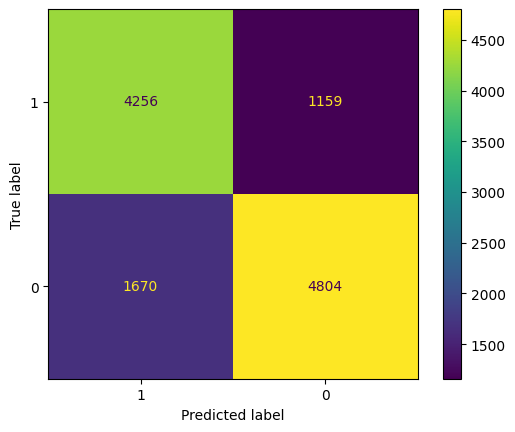

In [43]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Calcolo della matrice di confusione
cm = confusion_matrix(y_pred_test_bin_m2, y_test)
labels = [1,0]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()

## Validate the model and comment the results

please describe the evaluation procedure on a validation set, commenting the generalization capability of your model (e.g. under/overfitting). You may also describe the performance metrics that you choose: what is the most suitable performance measure (or set of performance measures) in this case/dataset, according to you? Why?

## Make predictions (on the provided test set)

Based on the results obtained and analyzed during the training and the validation phases, what are your (rather _personal_) expectations with respect to the performances of your model on the blind external test set? Briefly motivate your answer.

In [44]:
test_data = pd.read_csv("test.csv")
print(test_data.head())

      ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0   9956     180000    2          2         1   32     -1      2     -1   
1    879      50000    2          2         1   43      0      0      0   
2    554     240000    2          1         1   42      1     -1     -1   
3    142     180000    1          2         2   28     -1     -1     -1   
4  14630     320000    2          1         1   39      0      0      0   

   PAY_4  ...  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0      0  ...       7658       1000       1650       1000         0      7667   
1     -1  ...      20165      10732      10566      10757      1800      1775   
2     -2  ...          0          0          0          0      6370         0   
3     -1  ...        832        332        416        416         0       416   
4      0  ...     128832     133329      53870      13185      5000     15000   

   PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  
0         0      1

In [45]:
columns_delete = ['ID']
df_test = test_data.drop(columns=columns_delete)

In [46]:
# education 5 e 6 vanno in 4
df_test['EDUCATION'] = df_test['EDUCATION'].replace([0, 5, 6], 4)

In [47]:
# Definisci le colonne categoriali e numeriche
columns_to_encode = ['SEX', 'EDUCATION', 'MARRIAGE']
columns_pay = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

# Trova le colonne numeriche escludendo sia quelle da codificare che quelle di pagamento
numerical_columns = df_test.columns.difference(columns_to_encode + columns_pay)

In [48]:
# One hot encoding
df_test = pd.get_dummies(df_test, columns=columns_to_encode, drop_first=True)

In [49]:
scaler = StandardScaler()
df_test[numerical_columns] = scaler.fit_transform(df_test[numerical_columns])
#x_test = scaler.transform(x_test)

In [50]:
df_test

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_2,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,0.101294,-0.359696,-1,2,-1,0,-1,-1,-0.673565,-0.677321,...,-0.200284,-0.237562,-0.185286,True,True,False,False,True,False,False
1,-0.911995,0.821160,0,0,0,-1,0,0,-0.375293,-0.346942,...,-0.278185,-0.253059,-0.274983,True,True,False,False,True,False,False
2,0.568967,0.713810,1,-1,-1,-2,-2,-2,-0.701063,-0.601985,...,-0.301813,-0.301334,-0.304962,True,False,False,False,True,False,False
3,0.101294,-0.789098,-1,-1,-1,-1,-1,-1,-0.675761,-0.691201,...,-0.271047,-0.078133,-0.255177,False,True,False,False,False,True,False
4,1.192529,0.391758,0,0,0,0,0,0,2.150454,0.949813,...,0.005850,-0.110019,-0.005772,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,0.491021,2.646119,0,0,0,0,0,0,1.115828,1.159142,...,-0.048607,-0.028773,-0.062379,False,True,False,False,True,False,False
4496,-1.145832,1.143212,0,0,0,0,0,0,-0.459598,-0.431368,...,-0.282677,-0.156955,-0.304962,False,True,False,False,True,False,False
4497,-0.600214,-0.896449,2,2,2,2,2,0,0.515335,0.572403,...,-0.301813,-0.168816,-0.131432,False,False,True,False,False,True,False
4498,0.257185,-0.252345,2,-1,-1,-1,-1,-1,-0.686202,-0.681453,...,-0.282369,-0.223150,-0.263315,True,False,False,False,True,False,False


In [51]:
predictions = model.predict(df_test)

141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


# OPTIONAL -- Export the predictions in the format indicated in the assignment release page and verify you prediction on the [assessment page](https://aml-assignmentone-2425.streamlit.app/).

In [52]:
predicted_classes = (predictions > 0.5).astype(int)  # 1 se probabilità > 0.5, altrimenti 0
#predicted_classes3 = (predictions3 > 0.5).astype(int)

df_test['predicted_target'] = predicted_classes
#df_test['predicted_target3'] = predicted_classes3
#df_test.to_csv('test_with_predictions.csv', index=False)


In [53]:
# Crea un DataFrame con le previsioni
predictions_df = pd.DataFrame(predicted_classes)

# Salva il DataFrame in un file CSV senza intestazioni e senza indice
#predictions_df.to_csv(r"C:\\Users\\lperf\\Downloads\\predictions.csv", header=False, index=False)